<a href="https://colab.research.google.com/github/Rahullnitp/Alphabet_Inc_Stock_Market_Prediction/blob/master/Alphabet_Inc_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim

Stock market prediction of  Alphabet Inc. .



*  In this project , i will analyse and perform predictive analytics on the historic data of Alphabet Inc. and perform  a classification or regression task to predict future price or return. 

*   Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a corporate restructuring of Google, and became the parent company of Google and several former Google subsidiaries.  

#Data Collection :
     

*   Alpha vantage APIs is used for Data Collection of "Alphabet Inc." 

In [1]:
pip install alpha_vantage   #Python module to get stock data from the Alpha Vantage Api

 Extract data in 'data' and information of data in 'meta_data' variables respectively.


  





In [0]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='1Z4BA7A9NKB32IJL',output_format='pandas')  
data, meta_data = ts.get_daily('GOOGL', outputsize='full') #by using symbol as "GOOGL" ,we can extract the data of 'Alphabet Inc.' .

Overview of data
*  This API returns daily time series (date, daily open, daily high, daily low, daily close, daily volume, daily adjusted close, and split/dividend events) of the global equity specified, covering 20+ years of historical data as shown below in meta_data.

In [3]:
meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2019-12-11',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

#Data_preprocessing:

in this section, i will perform Data mining technique that involves transforming raw data into an understandable format and Data Cleaning .


In [0]:
# import libraries

import os
# %tensorflow_version 2.x
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams


In [5]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-12-11,1348.30,1349.89,1341.10,1344.25,914503.0
2019-12-10,1339.94,1348.00,1334.00,1342.89,880430.0
2019-12-09,1338.86,1357.55,1336.07,1342.99,1556889.0
2019-12-06,1332.75,1342.47,1331.23,1339.39,1648729.0
2019-12-05,1327.00,1327.98,1314.32,1326.96,1220631.0


In [6]:
data.shape

(3856, 5)

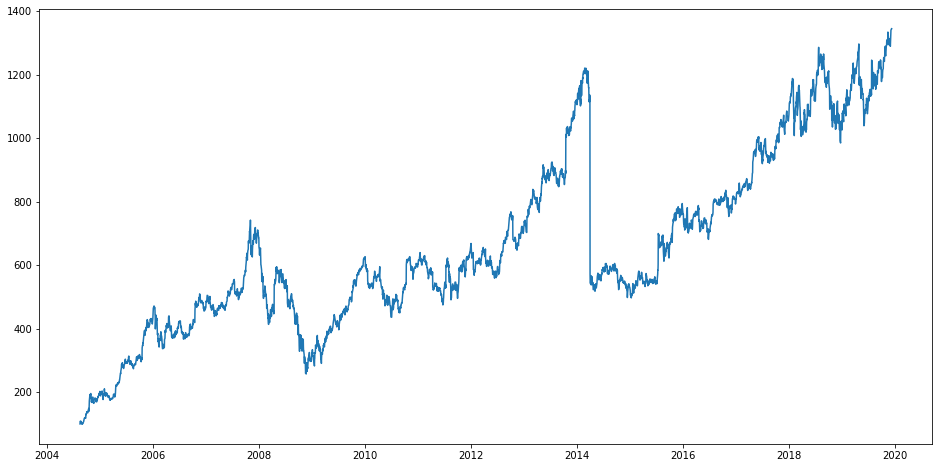

In [7]:
#Let’s plot the 'close' variable to understand how it’s shaping up in our data: 

plt.figure(figsize=(16,8))
plt.plot(data['4. close'], label='Close Price history')
plt.xlabel("Time")
plt.ylabel("Close_Value")

In [0]:
#Change the data format ,so that it will be easy to understand and readable.

data.columns=['open','high','low','close','volume']
data=data.reset_index()

In [9]:
data.head().transpose()

,0,1,2,3,4
date,2019-12-11 00:00:00,2019-12-10 00:00:00,2019-12-09 00:00:00,2019-12-06 00:00:00,2019-12-05 00:00:00
open,1348.3,1339.94,1338.86,1332.75,1327
high,1349.89,1348,1357.55,1342.47,1327.98
low,1341.1,1334,1336.07,1331.23,1314.32
close,1344.25,1342.89,1342.99,1339.39,1326.96
volume,914503,880430,1.55689e+06,1.64873e+06,1.22063e+06


In [10]:
data.describe()   # for statistical details like percentile, mean, std and quantiles of data.

,open,high,low,close,volume
count,3856.000000,3856.000000,3856.000000,3856.000000,3.856000e+03
mean,659.289664,665.370856,652.730002,659.136028,7.136392e+06
std,278.567076,280.225183,276.854834,278.677952,8.010723e+06
min,99.090000,101.740000,95.960000,100.010000,3.845900e+04
25%,475.132500,480.055000,470.320000,474.742500,1.925898e+06
50%,588.440000,592.370000,582.835000,587.325000,4.423500e+06
75%,829.022500,831.935000,823.386950,828.667500,9.148300e+06
max,1348.300000,1357.550000,1341.100000,1344.250000,8.215110e+07


In [11]:
data.info()        #Information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 6 columns):
date      3856 non-null datetime64[ns]
open      3856 non-null float64
high      3856 non-null float64
low       3856 non-null float64
close     3856 non-null float64
volume    3856 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 180.9 KB




*   'date' is of datetime type while all others are float




In [12]:
data.isnull().sum() # number of null values in each column.

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [13]:
data.head()

,date,open,high,low,close,volume
0,2019-12-11,1348.30,1349.89,1341.10,1344.25,914503.0
1,2019-12-10,1339.94,1348.00,1334.00,1342.89,880430.0
2,2019-12-09,1338.86,1357.55,1336.07,1342.99,1556889.0
3,2019-12-06,1332.75,1342.47,1331.23,1339.39,1648729.0
4,2019-12-05,1327.00,1327.98,1314.32,1326.96,1220631.0


#Models

##i).Moving Average



*   The predicted closing price for each day will be the average of a set of previously observed values. 

*   for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.



In [0]:
#arrange the data in ascending order
data=data.sort_values('date',ascending=True).reset_index().drop('index',axis=1)

In [15]:
data.head()

,date,open,high,low,close,volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0




* In this method we have the use of only 'date' and target feature 'close'.so,we will make a new dataframe called as 'data_M_A'

In [0]:
#make new dataframe
data_M_A=data[['date','close']]

In [0]:
#splitting in train and test set.
train_len=int(0.9*len(data_M_A))    # not using following method for splitting data as it rearrange the the data every time it splitt.
train=data_M_A[:train_len]          # x_train,x_valid,y_train,y_valid=train_test_split(data_M_A,y_label,test_size=.15,random_state=0)     # Split the data in two parts i.e. train and validation part.

valid=data_M_A[train_len:]

###Prediction

In [0]:
#Making the prediction
predictions = []
for i in range(0,valid.shape[0]):
    a = train['close'][len(train)-valid.shape[0]+i:].sum() + sum(predictions)
    b = a/(valid.shape[0])
    predictions.append(b)

In [19]:
#Checking the result(RMSE values)

ms=mean_squared_error(np.array(valid['close']), predictions)      
rms=np.sqrt(ms)
rms                                       # Mathematically: rms=np.sqrt(np.mean(np.power((np.array(y_valid)-predictions),2)))

171.80550736328757

###Plot

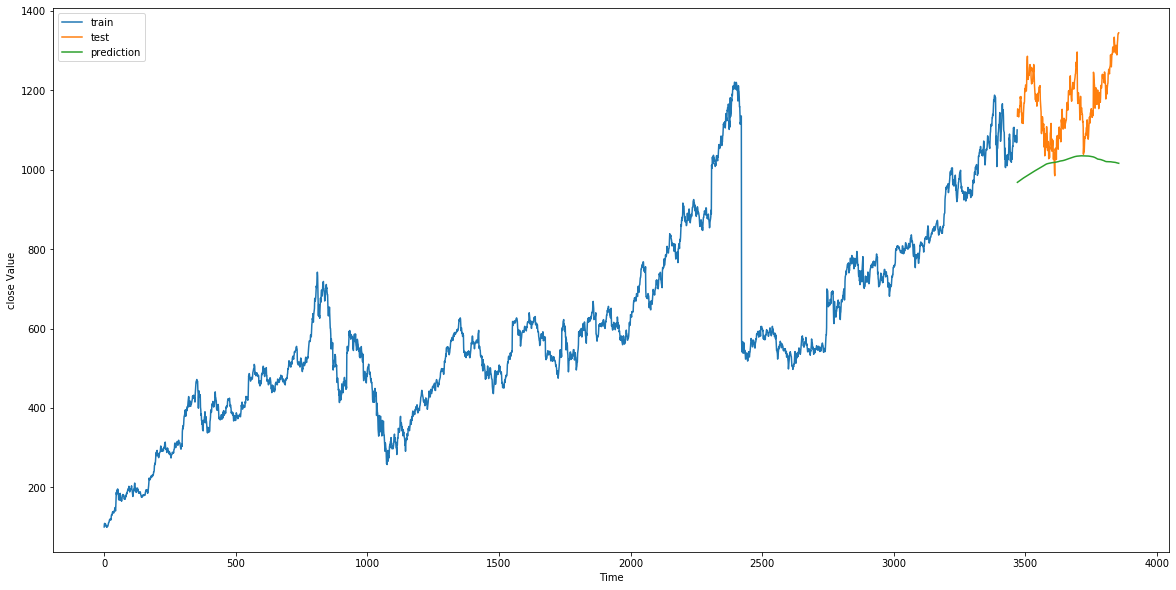

In [20]:
#plot
valid['predictions'] = 0
valid['predictions'] = predictions
plt.figure(figsize=(20,10))
plt.plot(train['close'],label="train")
plt.plot(valid['close'],label="test")
plt.plot(valid['predictions'],label="prediction")
#plt.plot(data['close'])
plt.legend()
plt.xlabel("Time")
plt.ylabel("close Value")
plt.show()

###Conclusion


*   RMSE value is close to 172 but the result is not very auscpicious.
*   As from the plot ,the predicted value are following the same trend as the observed value, first increase then decrease 



##ii). Linear Regression



*   This returns an equation that determines the relationship between independent variables and dependent variables('close').                      

We will first create a separate dataset, so that any feature engineering based on the model doesn't affect the original dataset.



###Dummy Dataset 

In [21]:
data_L_R=data[['date','close']]
data_L_R.head()

,date,close
0,2004-08-19,100.335
1,2004-08-20,108.310
2,2004-08-23,109.400
3,2004-08-24,104.870
4,2004-08-25,106.000


In [0]:
#setting index as date value
data_L_R.index=data_L_R['date']

###Feature_Engineering


* we can extract more features from 'date' column other than 'day','month' and 'year' like :

*   'Dayofweek',
*   'Dayofyear',

*   'Is_month_end' or 'Is_month_start' etc.






 



In [23]:
!pip install fastai==0.7.0  #install fastai for using structured module

  Using cached https://files.pythonhosted.org/packages/50/6d/9d0d6e17a78b0598d5e8c49a0d03ffc7ff265ae62eca3e2345fab14edb9b/fastai-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/a5/e8b50b55b1abac9f1e3346c4242f1e42a82d368a8442cbd50c532922f6c4/torch-0.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f5/20/865d4785f86e86f7ad7ebd52fc14810ef59ef13cd959f1363a2615d1c665/pandas_summary-0.0.7-py2.py3-none-any.whl
     |████████████████████████████████| 1.5MB 9.8MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2661244 sha256=37772a83a86e054b461dbd97e26925f5161f2d83514e63ba0fc6f5641e5f4d76
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling tor

In [0]:
from fastai.structured import add_datepart
add_datepart(data_L_R,'date')

In [25]:
data_L_R.head()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
date,,,,,,,,,,,,,,
2004-08-19,100.335,2004,8,34,19,3,232,False,False,False,False,False,False,1092873600
2004-08-20,108.310,2004,8,34,20,4,233,False,False,False,False,False,False,1092960000
2004-08-23,109.400,2004,8,35,23,0,236,False,False,False,False,False,False,1093219200
2004-08-24,104.870,2004,8,35,24,1,237,False,False,False,False,False,False,1093305600
2004-08-25,106.000,2004,8,35,25,2,238,False,False,False,False,False,False,1093392000


Elapsed is the timestamp, so we can drop it.

In [0]:
#dropping 'Elapsed' column
data_L_R=data_L_R.drop('Elapsed',axis=1)

In [27]:
data_L_R.head()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
date,,,,,,,,,,,,,
2004-08-19,100.335,2004,8,34,19,3,232,False,False,False,False,False,False
2004-08-20,108.310,2004,8,34,20,4,233,False,False,False,False,False,False
2004-08-23,109.400,2004,8,35,23,0,236,False,False,False,False,False,False
2004-08-24,104.870,2004,8,35,24,1,237,False,False,False,False,False,False
2004-08-25,106.000,2004,8,35,25,2,238,False,False,False,False,False,False


In [28]:
data_L_R['mon_fri']=0

data_L_R['mon_fri']=[1 if (i==0 or i==4) else 0 for i in data_L_R['Dayofweek']  ] # explanation of "if else comprehensive list" : https://colab.research.google.com/drive/1dnubPliz3FdmNFVocK8ERr1MP0BocDnT?authuser=1#scrollTo=UJWzqjkPH9UC
data_L_R.head()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
date,,,,,,,,,,,,,,
2004-08-19,100.335,2004,8,34,19,3,232,False,False,False,False,False,False,0
2004-08-20,108.310,2004,8,34,20,4,233,False,False,False,False,False,False,1
2004-08-23,109.400,2004,8,35,23,0,236,False,False,False,False,False,False,1
2004-08-24,104.870,2004,8,35,24,1,237,False,False,False,False,False,False,0
2004-08-25,106.000,2004,8,35,25,2,238,False,False,False,False,False,False,0


if the day of the week is equal to 0 or 4, the 'mon_fri' column will be 1 otherwise it will be 0.

###Train_Test split 

In [0]:
#splitting in train and test set.
train_len=int(0.9*len(data_L_R))    # not using following method for splitting data as it rearrange the the data every time it splitt.
train=data_L_R[:train_len]          # x_train,x_valid,y_train,y_valid=train_test_split(data_M_A,y_label,test_size=.15,random_state=0)     # Split the data in two parts i.e. train and validation part.

valid=data_L_R[train_len:]

In [0]:
x_train=train.drop('close',axis=1)
y_train=train['close']
x_valid=valid.drop('close',axis=1)
y_valid=valid['close']

###Model_Training

In [31]:
from sklearn.linear_model import LinearRegression
L_R_Model=LinearRegression()
L_R_Model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Prediction

In [0]:
Predict_L_R=L_R_Model.predict(x_valid)

###Evaluation

In [33]:
#Checking the result(RMSE values)

ms=mean_squared_error(y_valid, Predict_L_R)      
rms=np.sqrt(ms)
rms                                       # Mathematically: rms=np.sqrt(np.mean(np.power((np.array(y_valid)-predictions),2)))

214.86830991943964

Linear Regression perform poorly than Moving Average technnique as RMSE value for Linear Regression is higher than Moving Average.

###Plot

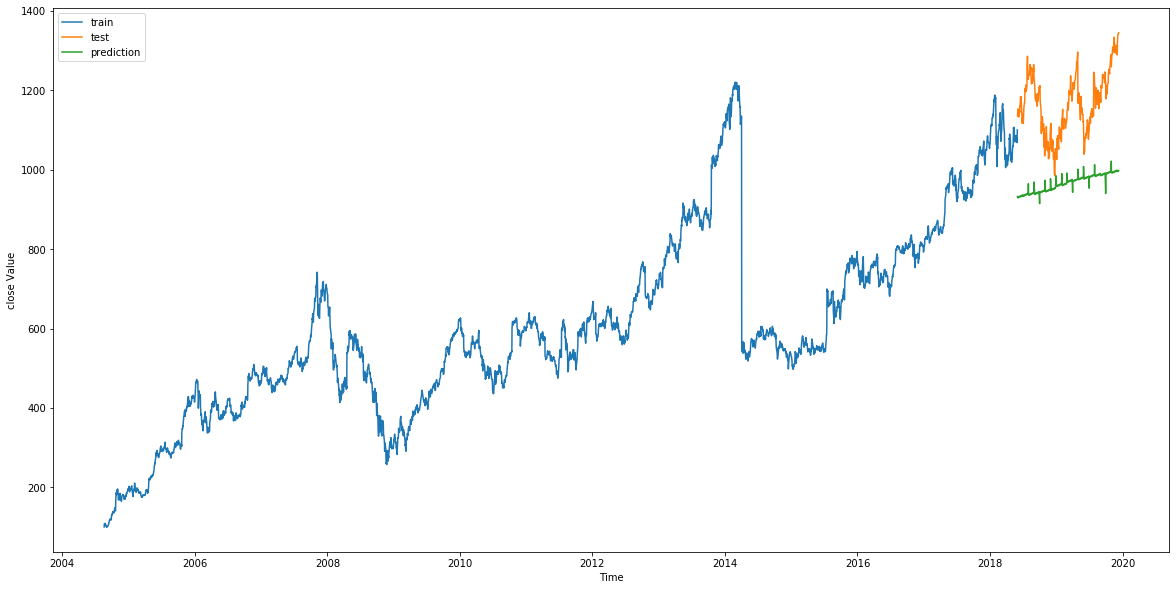

In [34]:
#plot
valid['predictions'] = 0
valid['predictions'] = Predict_L_R
plt.figure(figsize=(20,10))
plt.plot(train['close'],label="train")
plt.plot(valid['close'],label="test")
plt.plot(valid['predictions'],label="prediction")
plt.legend()
plt.xlabel("Time")
plt.ylabel("close Value")
plt.show()



*   Linear Regresion is  simple technique and easy to interpret.
*   But it is prone to overfitting it performs well for problem where the independent features are useful for determining the target value.






##iii) Auto Arima
*   Polpular Statistical method for time series forecasting.
*   It process past values  to predict the future values.

In [35]:
pip install pyramid-arima 

     |████████████████████████████████| 604kB 6.6MB/s 


In [0]:
# import pyramid
from pyramid.arima import auto_arima 

###Dummy Dataset

In [0]:
data_Auto_Arima=data

In [0]:
# setting date as index value
data_Auto_Arima.index=data_Auto_Arima['date']

###Train_Test_Split

In [0]:
#splitting in train and test set.
train_len=int(0.9*len(data_Auto_Arima))    # not using following method for splitting data as it rearrange the the data every time it splitt.
train=data_Auto_Arima[:train_len]          # x_train,x_valid,y_train,y_valid=train_test_split(data_M_A,y_label,test_size=.15,random_state=0)     # Split the data in two parts i.e. train and validation part.

valid=data_Auto_Arima[train_len:] 

In [0]:
training = train['close']    # it only perform on target value as it process past value to predict future value.
validation = valid['close']

###Model training 


In [62]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3,max_q=3,m=12,start_P=0,seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=28155.254, BIC=28185.995, Fit time=33.804 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=30536.750, BIC=30549.046, Fit time=0.264 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=29523.430, BIC=29548.023, Fit time=8.771 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=28154.355, BIC=28178.948, Fit time=31.041 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=28155.695, BIC=28186.436, Fit time=38.487 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=30534.820, BIC=30553.264, Fit time=1.305 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=28155.688, BIC=28186.429, Fit time=72.902 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=28157.467, BIC=28194.356, Fit time=32.973 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=28155.257, BIC=28173.701, Fit time=21.108 seconds
Fit 

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

##Predictions

In [0]:
forecast=model.predict(n_periods=len(valid))
forecast=pd.DataFrame(forecast,index=valid.index,columns=['Predictions'])

##Evaluation

In [64]:
#Checking the result(RMSE values)

ms=mean_squared_error(np.array(valid['close']),(forecast['Predictions']))      
rms=np.sqrt(ms)
rms                                       # Mathematically: rms=np.sqrt(np.mean(np.power((np.array(y_valid)-predictions),2)))

70.59542866345414

###Plot

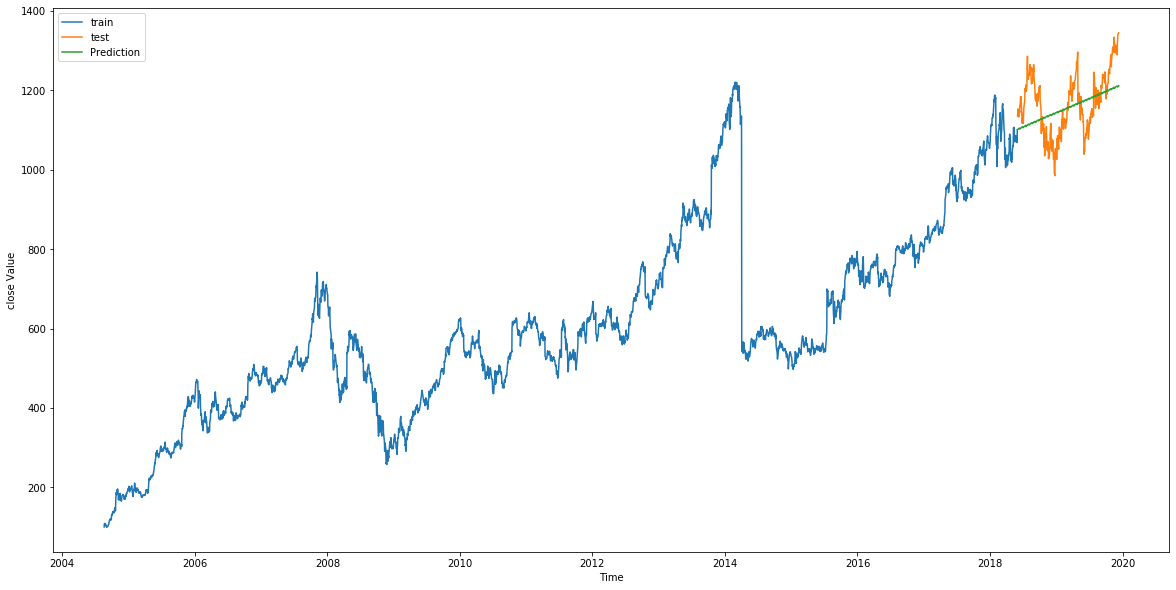

In [67]:
plt.figure(figsize=(20,10))
plt.plot(train['close'],label="train")
plt.plot(valid['close'],label="test")
plt.plot(forecast['Predictions'],label="Prediction")
plt.legend()
plt.xlabel("Time")
plt.ylabel("close Value")
plt.show()

the model has captured a trend in the series, but does not focus on the seasonal part.

###Conclusion
* an auto ARIMA model uses past data to understand the pattern in the time series ,using these values the model  captured an increasing trend in the series.
* These predictions are still not close to the real values but are far better than previously implemented machine learning model.

##iv).LSTM



*   use for sequnece predictions probem and is extremly  effective.
*   it is able to store past information that is important , and forget that is not.



In [0]:
# importing libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

###Dummy_DataFrame

In [0]:
data_LSTM=data[['date','close']]
data_LSTM.index=data['date']
data_LSTM=data_LSTM.drop('date',axis=1)

In [0]:
data_LSTM=data_LSTM.values

In [49]:
data_LSTM = data_LSTM.reshape(-1,1)

scaler = MinMaxScaler(feature_range = (0,1)) # Normalize data
data_LSTM = scaler.fit_transform(data_LSTM)
np.max(data_LSTM)

1.0

##Train-Test Split

In [50]:
# Test - Train Split
train_size = int(len(data_LSTM) * 0.75) # % 75 Train
test_size = len(data_LSTM) - train_size # % 25 Test
print("Train Size :",train_size,"Test Size :",test_size)

train = data_LSTM[0:train_size,:]
test = data_LSTM[train_size:len(data_LSTM),:]

Train Size : 2892 Test Size : 964


##Data_Preparation

In [51]:
time_stemp=10
datax = []
datay = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    datax.append(a)
    datay.append(train[i + time_stemp, 0])
trainx = np.array(datax)
trainy = np.array(datay)


datax = []
datay = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    datax.append(a)
    datay.append(test[i + time_stemp, 0])
testx = np.array(datax)
testy = np.array(datay)

trainx = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1])) # For Keras
testx = np.reshape(testx, (testx.shape[0], 1,testx.shape[1])) # For Keras
print(trainx.shape)
testx.shape

(2881, 1, 10)


(953, 1, 10)

##Model

In [52]:
epochs = 200
model = Sequential()
model.add(LSTM(10, input_shape = (1, time_stemp)))
model.add(Dense(1)) # Output Layer
model.compile(loss = "mean_squared_error", optimizer = "adam")
history = model.fit(trainx,trainy, epochs = epochs, batch_size = 50, verbose=0)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










##Loss Visualization

In [53]:
epoch = np.arange(0, epochs, 10)
losses = []
for i in epoch:
    if i % 10 == 0:
        losses.append(history.history["loss"][i])
        
data_visualize = {"epoch":epoch,"loss":losses}
data_visualize = pd.DataFrame(data_visualize) # Create dataframe for visualize with plotly

# Visualize
import plotly.express as px

fig = px.line(data_visualize,x="epoch",y="loss",width = 1200, height = 500)
fig.show()
# I choose plotly for visualize because it's interactive

##Prediction

In [54]:
train_predict = model.predict(trainx)
test_predict = model.predict(testx)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
trainy = scaler.inverse_transform([trainy])
testy = scaler.inverse_transform([testy])

train_score = math.sqrt(mean_squared_error(trainy[0], train_predict[:,0])) # mean_squared_error -> Loss Function
print("Train Score : %2.f RMSE" % (train_score))
test_score = math.sqrt(mean_squared_error(testy[0], test_predict[:,0]))
print("Test Score : %2.f RMSE" % (test_score))

Train Score : 15 RMSE
Test Score : 17 RMSE


##Plot

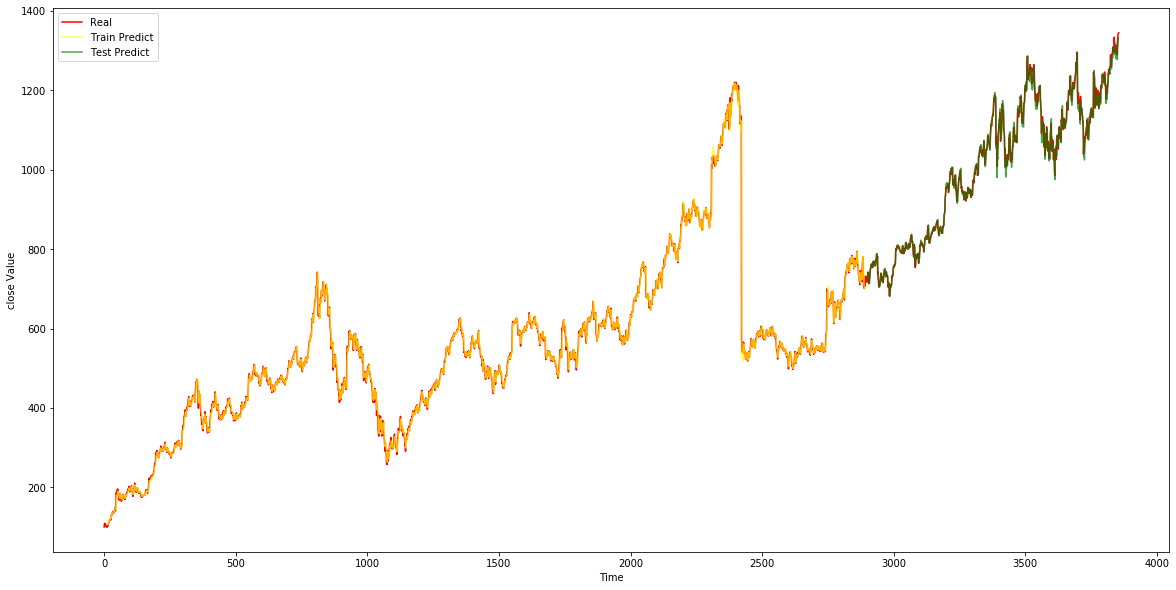

In [55]:
# empty_like -> Return a new array with the same shape and type as a given array.
train_predict_plot = np.empty_like(data_LSTM)
train_predict_plot[:,:] = np.nan
train_predict_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict

test_predict_plot = np.empty_like(data_LSTM)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_stemp*2)+1:len(data_LSTM)-1, :] = test_predict

plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(data_LSTM),color = "red",label = "Real")
plt.plot(train_predict_plot,label = "Train Predict",color = "yellow",alpha = 0.7)
plt.plot(test_predict_plot,label = "Test Predict",color = "green", alpha = 0.7)
plt.legend()
plt.xlabel("Time")
plt.ylabel("close Value")
plt.show()